# Homework Assignment: Data Cleaning and Visualization with the Iris Dataset


In this assignment, we'll use the classic Iris dataset to demonstrate how to load a messy dataset, handle missing values, compute summary statistics, and create a bar chart and a histogram.

In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Iris Dataset
We'll use Seaborn's built-in Iris dataset and introduce some missing values to simulate a messy dataset.

In [2]:
# Load the iris dataset
iris = sns.load_dataset('iris')
# Introduce some missing values for demonstration
import numpy as np
iris.loc[iris.sample(frac=0.1, random_state=42).index, 'sepal_length'] = np.nan
iris.loc[iris.sample(frac=0.05, random_state=1).index, 'species'] = np.nan
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Handle Missing Values
Let's check for missing values and handle them appropriately. We'll fill missing numeric values with the mean and drop rows with missing categorical values.

In [3]:
# Check for missing values
iris.isnull().sum()

sepal_length    15
sepal_width      0
petal_length     0
petal_width      0
species          8
dtype: int64

In [4]:
# Fill missing numeric values with the mean
iris['sepal_length'] = iris['sepal_length'].fillna(iris['sepal_length'].mean())
# Drop rows with missing categorical values (species)
iris_clean = iris.dropna(subset=['species']).copy()
iris_clean.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Summary Statistics
Let's view summary statistics for the cleaned dataset.

In [5]:
# Summary statistics
iris_clean.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,142.000000,142.000000,142.000000,142.000000,142
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,48
mean,5.823709,3.036620,3.772535,1.200704,NaN
std,0.784358,0.422502,1.761694,0.763669,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.125000,2.800000,1.600000,0.300000,NaN
50%,5.833333,3.000000,4.350000,1.300000,NaN
75%,6.375000,3.300000,5.100000,1.800000,NaN


## Bar Chart: Species Count
Let's plot a bar chart showing the count of each Iris species.

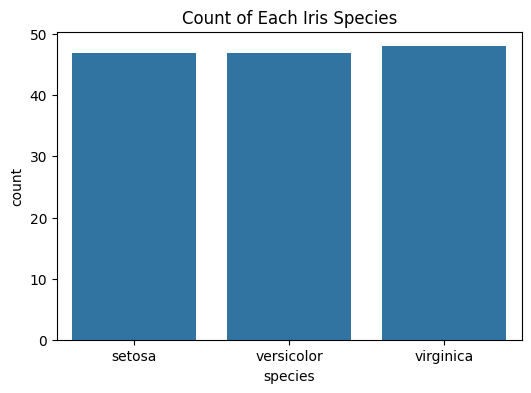

In [6]:
# Bar chart of species count
plt.figure(figsize=(6,4))
sns.countplot(data=iris_clean, x='species')
plt.title('Count of Each Iris Species')
plt.show()

## Histogram: Sepal Length
Let's plot a histogram of the sepal length.

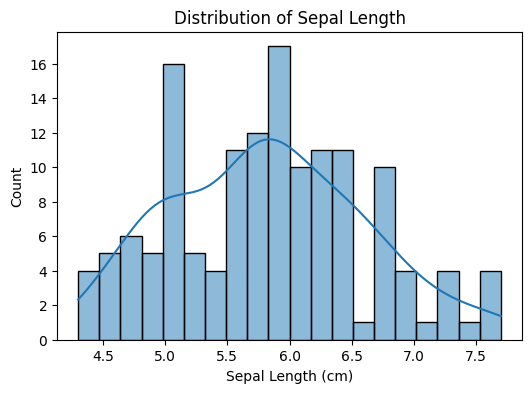

In [7]:
# Histogram of sepal length
plt.figure(figsize=(6,4))
sns.histplot(iris_clean['sepal_length'], bins=20, kde=True)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.show()